We simulate 1000 obersvations from a normal distribution with mean 2 and std deviation 3. 
We also simulate an error component from a normal distribution with mean 0 and standard deviation 3.
We use these simulated values to create a series of linear models to check and test regression assumptions 

In [31]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
mean = 2
stdv = 3
a = 1
b = 3.3
x = np.random.normal(mean, stdv, 1000)
e = np.random.normal(0,3,1000)
y = a + b*x + e

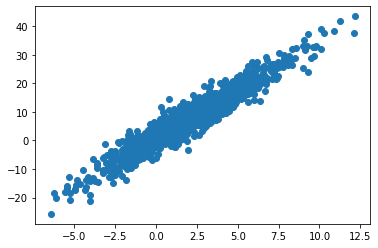

In [28]:
plt.scatter(x,y)
plt.show()


In [35]:
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.804e+04
Date:                Tue, 05 May 2020   Prob (F-statistic):                        0.00
Time:                        01:01:16   Log-Likelihood:                         -2544.9
No. Observations:                1000   AIC:                                      5092.
Df Residuals:                     999   BIC:                                      5097.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We will simulate the same model as the one above but with heterskedastic errors and see how it affects the confidence interval of the coefficient 

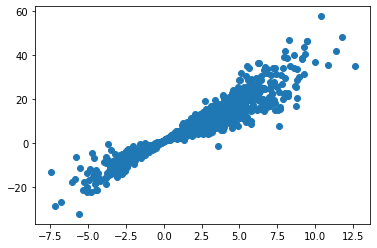

In [40]:
e1 = x*np.random.normal(0,1,1000)
y1 = a + b*x + e1
plt.scatter(x,y1)
plt.show()

In [42]:
model1 = sm.OLS(y1,x).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          1.213e+04
Date:                Tue, 05 May 2020   Prob (F-statistic):                        0.00
Time:                        01:06:46   Log-Likelihood:                         -2776.9
No. Observations:                1000   AIC:                                      5556.
Df Residuals:                     999   BIC:                                      5561.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------